In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


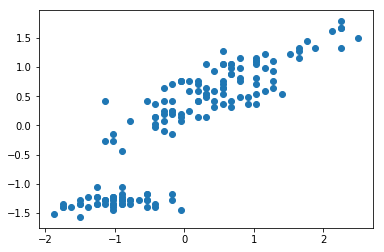

In [8]:
X = df[["SepalLengthCm", "PetalLengthCm"]]
X = preprocessing.StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])

In [9]:
kmeans = cluster.KMeans(n_clusters=3)
y_k = kmeans.fit_predict(X) 

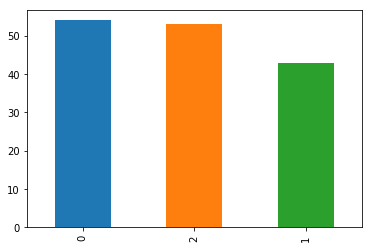

In [12]:
pd.Series(y_k).value_counts().plot.bar()

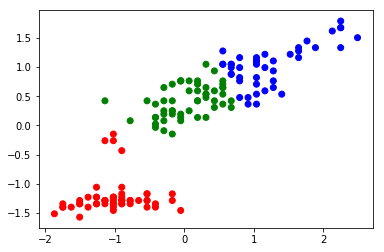

In [13]:
cmap = {0: "red", 1: "blue", 2: "green"}
colors = pd.Series(y_k).apply(lambda k: cmap[k])
plt.scatter(X[:, 0], X[:, 1], color = colors)

In [14]:
cenroids = kmeans.cluster_centers_

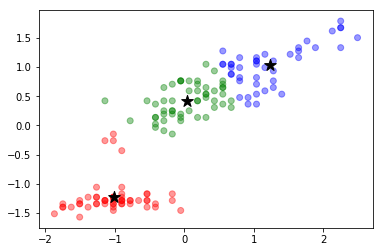

In [24]:
fig, ax = plt.subplots()
cmap = {0: "red", 1: "blue", 2: "green"}
colors = pd.Series(y_k).apply(lambda k: cmap[k])
ax.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.4)
ax.scatter(cenroids[:, 0], cenroids[:, 1], marker="*", s=150, color = "black")

In [26]:
distances = np.zeros([len(y_k)])
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(centroid)
    distances[y_k == i] = np.sqrt(np.sum((X[y_k == i] - centroid) ** 2, axis=1))

[-1.01511749 -1.22859407]
[1.22961906 1.02857275]
[0.03665519 0.41727267]


In [28]:
res = pd.DataFrame({"point": df.index, "cluster": y_k, "distance": distances})
res

,cluster,distance,point
0,0,0.160599,0
1,0,0.170454,1
2,0,0.407209,2
3,0,0.494562,3
4,0,0.112879,4
5,0,0.481437,5
6,0,0.504156,6
7,0,0.056217,7
8,0,0.742340,8
9,0,0.139547,9


In [31]:
(res.distance ** 2).sum()

43.03887066676178

In [30]:
kmeans.inertia_

43.038870666761774

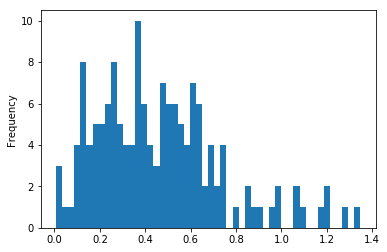

In [33]:
res.distance.plot.hist(bins = 50)

In [35]:
res.sort_values("distance", ascending = False).head()

,cluster,distance,point
131,1,1.348258,131
118,1,1.270726,118
117,1,1.206364,117
122,1,1.206364,122
106,2,1.179680,106


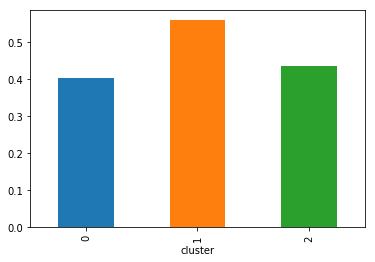

In [37]:
res.groupby("cluster").distance.mean().plot.bar()

In [42]:
outliers = {}
for i in np.unique(y_k):
    outliers[i] = res[res.cluster == i]\
            .sort_values("distance", ascending = False).iloc[:3, :].index

In [43]:
outliers

{0: Int64Index([60, 14, 57], dtype='int64'),
 1: Int64Index([131, 118, 117], dtype='int64'),
 2: Int64Index([106, 59, 134], dtype='int64')}

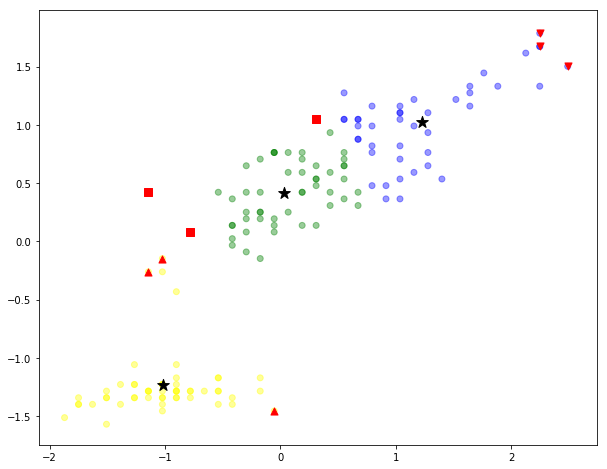

In [56]:
fig, ax = plt.subplots(figsize = (10, 8))
cmap = {0: "yellow", 1: "blue", 2: "green"}
colors = pd.Series(y_k).apply(lambda k: cmap[k])
ax.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.4)
ax.scatter(cenroids[:, 0], cenroids[:, 1], marker="*", s=150, color = "black")

shapes = ["^", "v", "s"]
for i in outliers:
    points = X[outliers[i]]
    ax.scatter(points[:, 0], points[:, 1], marker=shapes[i], s = 50, color = "red")

In [57]:
y = preprocessing.LabelEncoder().fit_transform(df.Species)

In [58]:
metrics.homogeneity_score(y, y_k)

0.5826296711195839

Text(0.5,1,'True groups')

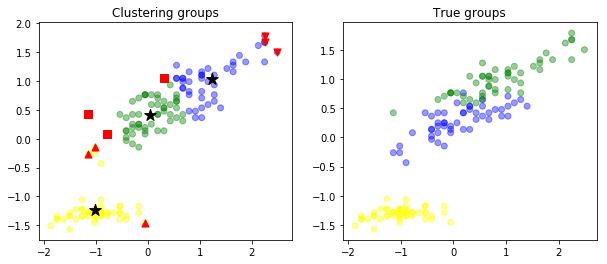

In [66]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
cmap = {0: "yellow", 1: "blue", 2: "green"}
ax = axes[0]
colors = pd.Series(y_k).apply(lambda k: cmap[k])
ax.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.4)
ax.scatter(cenroids[:, 0], cenroids[:, 1], marker="*", s=150, color = "black")

shapes = ["^", "v", "s"]
for i in outliers:
    points = X[outliers[i]]
    ax.scatter(points[:, 0], points[:, 1], marker=shapes[i], s = 50, color = "red")
ax.set_title("Clustering groups")
    
ax = axes[1]
colors = pd.Series(y).apply(lambda k: cmap[k])
ax.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.4)
ax.set_title("True groups")

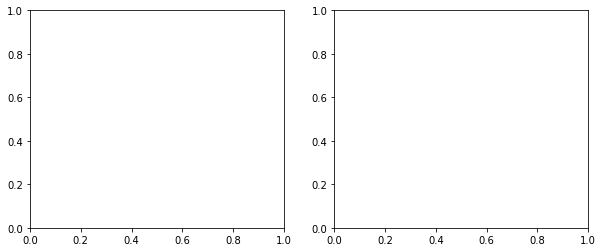

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))